In [1]:
import pandas as pd
drink=pd.read_csv("strongdrink.txt")
drink.describe()

,cultivar,alco,malic,ash,alk,magn,tot_phen,flav,nonfl_phen,proanth,color_int,hue,OD280rat,proline
count,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000,176.000000
mean,1.926136,13.006534,2.327159,2.367386,19.492045,99.840909,2.298920,2.043352,0.359545,1.597727,5.031761,0.961000,2.623409,748.477273
std,0.771047,0.814431,1.117747,0.275617,3.355821,14.329499,0.627333,0.995579,0.123046,0.571958,2.317965,0.227225,0.705369,316.208737
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.597500,2.210000,17.175000,88.000000,1.747500,1.242500,0.267500,1.250000,3.200000,0.790000,1.990000,500.000000
50%,2.000000,13.050000,1.845000,2.360000,19.500000,98.000000,2.380000,2.155000,0.340000,1.560000,4.640000,0.975000,2.780000,673.500000
75%,3.000000,13.682500,3.047500,2.560000,21.500000,107.250000,2.800000,2.882500,0.430000,1.952500,6.147500,1.120000,3.172500,986.250000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


**(a)**

<IPython.core.display.Javascript object>


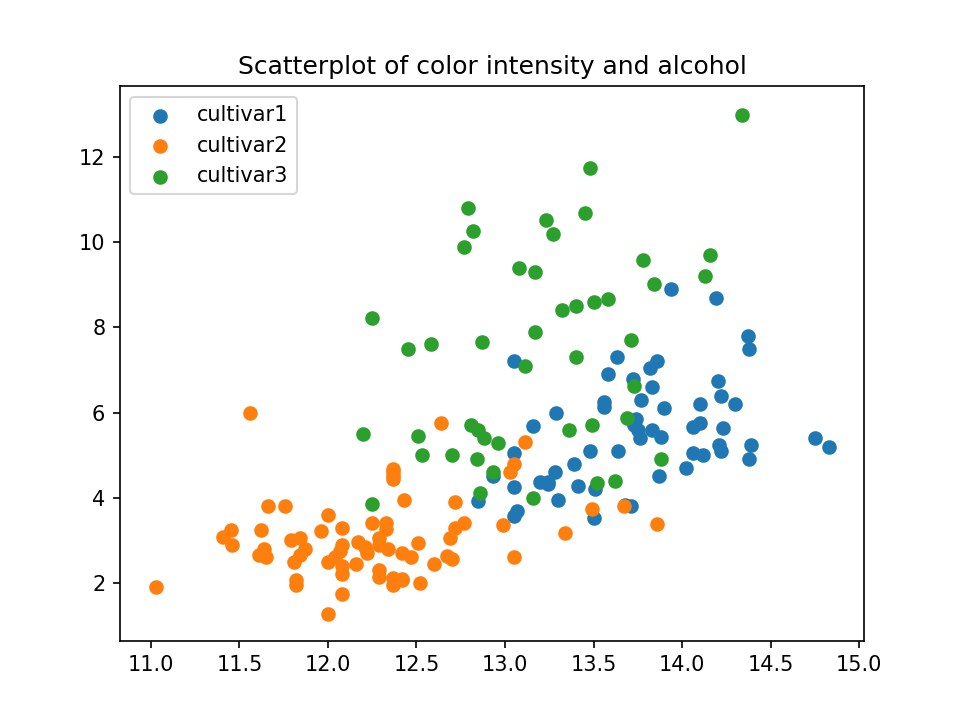

In [4]:
import matplotlib.pyplot as plt
%matplotlib notebook
for cultivar, group in drink.groupby(['cultivar']):
    plt.scatter(group['alco'], group['color_int'],label="cultivar"+str(cultivar))
plt.legend()
plt.title("Scatterplot of color intensity and alcohol")
plt.show()

**(b)**

In [15]:
from sklearn.linear_model import LogisticRegression 
drink["constant"]=1
y = drink["cultivar"].values
X = drink[["constant","alco","malic","tot_phen",
      "color_int"]].values

from scipy.stats import uniform as sp_uniform
param_dist1 = {"penalty": ["l1", "l2"] , "C": sp_uniform(0.1, 10.0)}

from sklearn.model_selection import RandomizedSearchCV
random_search = RandomizedSearchCV(LogisticRegression(), param_distributions=param_dist1,
                                   n_iter=200, n_jobs=-1, cv=5, random_state=25, scoring='neg_mean_squared_error')
rs_fit1 = random_search.fit(X, y)
print("optimal parameter values =", rs_fit1.best_estimator_)
print("optimal tuning parameter values =",rs_fit1.best_params_)
print("MSE = ", abs(rs_fit1.best_score_))#best_score_ can be negative

optimal parameter values = LogisticRegression(C=2.665871587495725, class_weight=None, dual=False,
          fit_intercept=True, intercept_scaling=1, max_iter=100,
          multi_class='warn', n_jobs=None, penalty='l1', random_state=None,
          solver='warn', tol=0.0001, verbose=0, warm_start=False)
optimal tuning parameter values = {'C': 2.665871587495725, 'penalty': 'l1'}
MSE =  0.11931818181818182


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:922: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


**(c)**

In [16]:
from scipy.stats import randint as sp_randint
param_dist2 = {"n_estimators": [10, 200], 
               "max_depth": [2, 4], 
               "min_samples_split": sp_randint(2, 20), 
               "min_samples_leaf": sp_randint(2, 20), 
               "max_features": sp_randint(1, 4)}

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier

random_search2 = RandomizedSearchCV(RandomForestRegressor(), param_distributions=param_dist2,
                                   n_iter=200, n_jobs=-1, cv=5, random_state=25, scoring='neg_mean_squared_error')
rs_fit2 = random_search2.fit(X, y)
print("optimal parameter values =", rs_fit2.best_estimator_)
print("optimal tuning parameter values =",rs_fit2.best_params_)
print("MSE = ", abs(rs_fit2.best_score_))#best_score_ can be negative

optimal parameter values = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=4,
           max_features=3, max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=2,
           min_samples_split=3, min_weight_fraction_leaf=0.0,
           n_estimators=200, n_jobs=None, oob_score=False,
           random_state=None, verbose=0, warm_start=False)
optimal tuning parameter values = {'max_depth': 4, 'max_features': 3, 'min_samples_leaf': 2, 'min_samples_split': 3, 'n_estimators': 200}
MSE =  0.22442108484807236


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


**(d)**

In [17]:
from sklearn.svm import SVC 
param_dist3 = {'C': sp_uniform(loc=0.1, scale=10.0),
               'gamma': ['scale', 'auto'],
               'shrinking': [True, False]}
random_search3 = RandomizedSearchCV(SVC(kernel="rbf"), param_distributions=param_dist3,
                                   n_iter=200, n_jobs=-1, cv=5, random_state=25, scoring='neg_mean_squared_error')
rs_fit3 = random_search3.fit(X, y)
print("optimal parameter values =", rs_fit3.best_estimator_)
print("optimal tuning parameter values =",rs_fit3.best_params_)
print("MSE = ", abs(rs_fit3.best_score_))#best_score_ can be negative

optimal parameter values = SVC(C=3.3605112613782553, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)
optimal tuning parameter values = {'C': 3.3605112613782553, 'gamma': 'scale', 'shrinking': True}
MSE =  0.1534090909090909


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)


**(e)**

In [18]:
from sklearn.neural_network import MLPClassifier 
param_dist4 = {"hidden_layer_sizes": sp_randint(1, 100),
               "activation": ["logistic", "relu"], 
               "alpha": sp_uniform(0.1, 10.0)}
random_search4 = RandomizedSearchCV(MLPClassifier(), param_distributions=param_dist4,
                                   n_iter=200, n_jobs=-1, cv=5, random_state=25, scoring='neg_mean_squared_error')
rs_fit4 = random_search4.fit(X, y)
print("optimal parameter values =", rs_fit4.best_estimator_)
print("optimal tuning parameter values =",rs_fit4.best_params_)
print("MSE = ", abs(rs_fit4.best_score_))#best_score_ can be negative

optimal parameter values = MLPClassifier(activation='relu', alpha=3.0723443366017835, batch_size='auto',
       beta_1=0.9, beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=96, learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
       random_state=None, shuffle=True, solver='adam', tol=0.0001,
       validation_fraction=0.1, verbose=False, warm_start=False)
optimal tuning parameter values = {'activation': 'relu', 'alpha': 3.0723443366017835, 'hidden_layer_sizes': 96}
MSE =  0.20454545454545456


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\model_selection\_search.py:841: DeprecationWarning: The default of the `iid` parameter will change from True to False in version 0.22 and will be removed in 0.24. This will change numeric results when test-set sizes are unequal.
  DeprecationWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neural_network\multilayer_perceptron.py:562: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)


**(f)**

Comparing the mse of each model, I think the multinomial logistic model is the best predictor of cultivar since its mse is around 0.12, which is the smallest.